# PENENTUAN STATUS GIZI DENGAN INDEKS MASSA TUBUH (IMT) MENGGUNAKAN METODE FUZZY LOGIC

## Install scikit-fuzzy

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e4cf2fdbfcc03f582af3a4dba8b037628bc4847b78015c981eec42b165afef86
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


## Import Packages yang dibutuhkan

In [2]:
# import packages yang dibutuhkan
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## Definisikan Universe

In [3]:
# definisikan universe
x_berat = np.arange(35, 81, 1) 
x_tinggi = np.arange(145, 191, 1) 
x_gizi  = np.arange(13, 34, 1)

## Berdasarkan formula yang sudah di jelaskan maka:

In [4]:
# Generate fuzzy Triangle membership functions
# qual = berat, serv = tinggi, tip = gizi

#KTB : Kurus Tingkat Berat 
#KTR : Kurus Tingkat Ringan 
#GTR : Gemuk Tingkat Ringan 
#GTB : Gemuk Tingkat Berat

berat_lo = fuzz.trapmf(x_berat, [35, 35, 40, 55])
berat_md = fuzz.trimf(x_berat, [45,55,65])
berat_hi = fuzz.trapmf(x_berat, [55,75,85,85])
tinggi_lo = fuzz.trapmf(x_tinggi, [145,145,150,165])
tinggi_md = fuzz.trimf(x_tinggi, [150,165,175])
tinggi_hi = fuzz.trapmf(x_tinggi, [160,175,190,190])
gizi_ktb = fuzz.trapmf(x_gizi, [13,13,16,17])
gizi_ktr = fuzz.trapmf(x_gizi, [16,17,17.5,18.5])
gizi_normal = fuzz.trapmf(x_gizi, [17.5,18.5,24,25])
gizi_gtr = fuzz.trapmf(x_gizi, [24,25,26,27])
gizi_gtb = fuzz.trapmf(x_gizi, [26,27,33,33])

## Visualisasikan

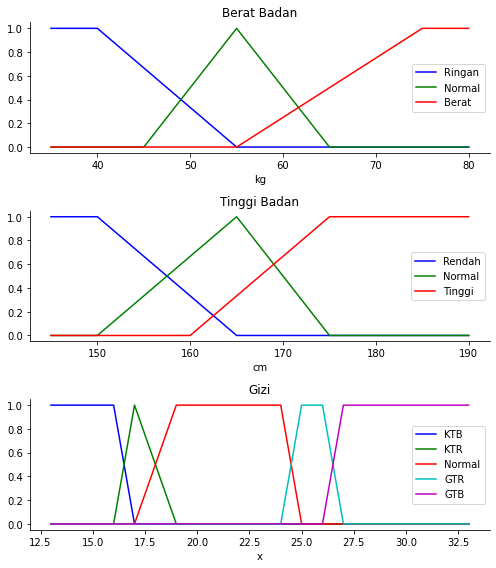

In [5]:
# Visualize these universes and membership functions
# qual = berat, serv = tinggi, tip = gizi

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(7, 8))
ax0.plot(x_berat, berat_lo, 'b', linewidth=1.5, label='Ringan')
ax0.plot(x_berat, berat_md, 'g', linewidth=1.5, label='Normal')
ax0.plot(x_berat, berat_hi, 'r', linewidth=1.5, label='Berat')
ax0.set_title('Berat Badan')
ax0.legend()
ax0.set_xlabel('kg')

ax1.plot(x_tinggi, tinggi_lo, 'b', linewidth=1.5, label='Rendah')
ax1.plot(x_tinggi, tinggi_md, 'g', linewidth=1.5, label='Normal')
ax1.plot(x_tinggi, tinggi_hi, 'r', linewidth=1.5, label='Tinggi')
ax1.set_title('Tinggi Badan')
ax1.legend()
ax1.set_xlabel('cm')

ax2.plot(x_gizi, gizi_ktb, 'b', linewidth=1.5, label='KTB')
ax2.plot(x_gizi, gizi_ktr, 'g', linewidth=1.5, label='KTR')
ax2.plot(x_gizi, gizi_normal, 'r', linewidth=1.5, label='Normal')
ax2.plot(x_gizi, gizi_gtr, 'c', linewidth=1.5, label='GTR')
ax2.plot(x_gizi, gizi_gtb, 'm', linewidth=1.5, label='GTB')
ax2.set_title('Gizi')
ax2.legend()
ax2.set_xlabel('x')

for ax in (ax0, ax1, ax2): 
  ax.spines['top'].set_visible(False) 
  ax.spines['right'].set_visible(False) 
  ax.get_xaxis().tick_bottom() 
  ax.get_yaxis().tick_left()
plt.tight_layout()

## Simulasi dengan memasukkan penilaian

In [40]:
# qual = berat, serv = tinggi, tip = gizi

berat_score = 51
tinggi_score = 163

berat_level_lo = fuzz.interp_membership(x_berat, berat_lo, berat_score)
berat_level_md = fuzz.interp_membership(x_berat, berat_md, berat_score)
berat_level_hi = fuzz.interp_membership(x_berat, berat_hi, berat_score)

tinggi_level_lo = fuzz.interp_membership(x_tinggi, tinggi_lo, tinggi_score)
tinggi_level_md = fuzz.interp_membership(x_tinggi, tinggi_md, tinggi_score)
tinggi_level_hi = fuzz.interp_membership(x_tinggi, tinggi_hi, tinggi_score)

## Selanjutnya aktifkan rule atau aturan yang telah kita definisikan pada pendahuluan.

[R1] : Jika berat badan adalah ringan dan tinggi badan adalah rendah maka status gizinya adalah
normal.

[R2] : Jika berat badan adalah ringan dan tinggi badan adalah normal maka status gizinya adalah kurus tingkat ringan.

[R3] : Jika berat badan adalah ringan dan tinggi badan adalah tinggi maka status gizinya adalah kurus tingkat berat.

[R4] : Jika berat badan adalah normal dan tinggi badan adalah rendah maka status gizinya adalah gemuk tingkat ringan.

[R5] : Jika berat badan adalah normal dan tinggi badan adalah normal maka status gizinya adalah normal. 

[R6] : Jika berat badan adalah normal dan tinggi badan adalah tinggi maka status gizinya adalah kurus tingkat ringan.

[R7] : Jika berat badan adalah berat dan tinggi badan adalah rendah maka status gizinya adalah gemuk tingkat berat.

[R8] : Jika berat badan adalah berat dan tinggi badan adalah normal maka status gizinya adalah gemuk tingkat ringan.

[R9] : Jika berat badan adalah berat dan tinggi badan adalah tinggi maka status gizinya adalah normal.

In [41]:
active_rule1_trian = np.fmax(np.fmin(berat_level_lo, tinggi_level_lo),
                       np.fmax(np.fmin(berat_level_md, tinggi_level_md), 
                               np.fmin(berat_level_hi, tinggi_level_hi)))
gizi_activation_normal_trian = np.fmin(active_rule1_trian, gizi_normal)

active_rule2_trian = np.fmax(np.fmin(berat_level_lo, tinggi_level_md),
                       np.fmin(berat_level_md, tinggi_level_hi))
gizi_activation_ktr_trian = np.fmin(active_rule2_trian, gizi_ktr)

active_rule3_trian = np.fmin(berat_level_lo, tinggi_level_hi)
gizi_activation_ktb_trian = np.fmin(active_rule3_trian, gizi_ktb)

active_rule4_trian = np.fmax(np.fmin(berat_level_md, tinggi_level_lo),
                       np.fmin(berat_level_hi, tinggi_level_md))
gizi_activation_gtr_trian = np.fmin(active_rule4_trian, gizi_gtr)

active_rule5_trian = np.fmax(berat_level_hi, tinggi_level_lo)
gizi_activation_gtb_trian = np.fmin(active_rule5_trian, gizi_gtb)

gizi0_trian = np.zeros_like(x_gizi)

## Dari output yang dihasilkan ini dilakukan defuzifikasi dengan menggunakan metode centroid. Metode ini dilakukan dengan mengambil titik pusat dari daerah hasil penggabungan penerapan semua rules. Hasil ini ditunjukkan oleh garis hitam.

In [42]:
# Aggregate all three output membership functions together
aggregated_trian = np.fmax(gizi_activation_normal_trian,
                     np.fmax(gizi_activation_ktr_trian,
                             np.fmax(gizi_activation_ktb_trian,
                                     np.fmax(gizi_activation_gtr_trian, gizi_activation_gtb_trian))))

# Calculate defuzzified result
gizi_trian = fuzz.defuzz(x_gizi, aggregated_trian, 'centroid')

#tip_activation_trian
gizi_activation_trian= fuzz.interp_membership(x_gizi, aggregated_trian, gizi_trian)

## Visualisasikan

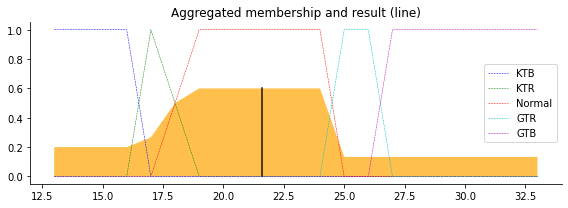

In [43]:
# Visualize this Trian
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_gizi, gizi_ktb, 'b', linewidth=0.5, linestyle='--', label='KTB')
ax0.plot(x_gizi, gizi_ktr, 'g', linewidth=0.5, linestyle='--', label='KTR')
ax0.plot(x_gizi, gizi_normal, 'r', linewidth=0.5, linestyle='--', label='Normal')
ax0.plot(x_gizi, gizi_gtr, 'c', linewidth=0.5, linestyle='--', label='GTR')
ax0.plot(x_gizi, gizi_gtb, 'm', linewidth=0.5, linestyle='--', label='GTB')
ax0.fill_between(x_gizi, gizi0_trian, aggregated_trian, facecolor='Orange', alpha=0.7)
ax0.plot([gizi_trian, gizi_trian], [0, gizi_activation_trian], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

ax0.legend()

for ax in (ax0, ax1, ax2): 
  ax.spines['top'].set_visible(False) 
  ax.spines['right'].set_visible(False) 
  ax.get_xaxis().tick_bottom() 
  ax.get_yaxis().tick_left()
plt.tight_layout()

## Lalu tampilkan hasil

In [44]:
print(gizi_trian)

21.587813620071678
